In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pylab as plt

import sys
sys.path.append('..')

import tidy3d as td
import tidy3d.web as web

In [4]:
# set up parameters of simulation
dl=0.01
pml = td.PML(num_layers=10)
sim_size = [4, 4, 4]
freq0 = 3e14
fwidth = 1e13
run_time = 10/fwidth

# create structure
dielectric = td.nk_to_medium(n=2, k=0, freq=freq0)
square = td.Structure(
    geometry=td.Box(center=[0, 0, 0], size=[1.5, 1.5, 1.5]),
    medium=dielectric)

# create source
source = td.VolumeSource(
    center=(-1.5, 0, 0),
    size=(0, 0.4, 0.4),
    source_time = td.GaussianPulse(
        freq0=freq0,
        fwidth=fwidth),
    polarization='Ex')

# create monitor
monitor = td.FieldMonitor(
    fields=['Ex', 'Hy'],
    center=(0, 0, 0),
    size=(4, 4, 0),
    freqs=[freq0])

# Initialize simulation
sim = td.Simulation(size=sim_size,
                    grid_size=(dl, dl, dl),
                    structures=[square],
                    sources={'source': source},
                    monitors={'monitor': monitor},
                    run_time=run_time,
                    pml_layers=(pml, pml, pml))

In [5]:
task_id = web.upload(sim, task_name='quickstart')
web.start(task_id)
web.monitor(task_id)

[11:37:39] INFO     Creating task.                                              ]8;id=963946;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:329

[11:37:40] INFO     Uploading the json file                                     ]8;id=58759;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:338

Output()

[11:37:41] status = queued                                                      ]8;id=878299;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:158

[11:37:48] status = preprocess                                                  ]8;id=178024;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:158

[11:38:11] status = running                                                     ]8;id=654310;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:158

[11:39:37] status = visualize                                                   ]8;id=456371;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:158

[11:39:41] status = success                                                     ]8;id=527528;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/tidy3d/web/webapi.py\webapi.py]8;;\:158

In [6]:
web.download(task_id, simulation=sim, path='data/sim_data.hdf5')

[11:39:42] INFO     clearing existing files before downloading                  ]8;id=233985;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:220

           INFO     removing file data/sim_data.hdf5                            ]8;id=704072;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     downloading file "simulation.json" to                       ]8;id=867154;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:371
                    "data/simulation.json"

Output()

           INFO     downloading file "monitor_data.hdf5" to                     ]8;id=870252;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:371
                    "data/monitor_data.hdf5"

Output()

[11:39:43] INFO     getting log string                                          ]8;id=756854;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:229

           INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=264964;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:371

Output()

[11:39:44] INFO     loading old monitor data to data dict                       ]8;id=330680;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:234

           INFO     creating SimulationData from monitor data dict              ]8;id=397366;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:239

           INFO     exporting SimulationData to data/sim_data.hdf5              ]8;id=788674;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:246

           INFO     clearing extraneous files                                   ]8;id=904115;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:249

           INFO     removing file data/simulation.json                          ]8;id=227550;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     removing file data/monitor_data.hdf5                        ]8;id=726060;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     removing file data/tidy3d.log                               ]8;id=324303;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     clearing existing files before downloading                  ]8;id=868960;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:220

           INFO     removing file data/sim_data.hdf5                            ]8;id=580150;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     downloading file "simulation.json" to                       ]8;id=896685;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:371
                    "data/simulation.json"

Output()

           INFO     downloading file "monitor_data.hdf5" to                     ]8;id=721160;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:371
                    "data/monitor_data.hdf5"

Output()

[11:39:45] INFO     getting log string                                          ]8;id=632420;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:229

           INFO     downloading file "tidy3d.log" to "data/tidy3d.log"          ]8;id=960360;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:371

Output()

[11:39:46] INFO     loading old monitor data to data dict                       ]8;id=963449;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:234

           INFO     creating SimulationData from monitor data dict              ]8;id=581845;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:239

           INFO     exporting SimulationData to data/sim_data.hdf5              ]8;id=949688;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:246

           INFO     clearing extraneous files                                   ]8;id=319098;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:249

           INFO     removing file data/simulation.json                          ]8;id=534086;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     removing file data/monitor_data.hdf5                        ]8;id=38983;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     removing file data/tidy3d.log                               ]8;id=376388;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:402

           INFO     loading SimulationData from data/sim_data.hdf5              ]8;id=237408;file:///Users/twhughes/Documents/Flexcompute/Tidy3D-client-revamp/notebooks/../tidy3d/web/webapi.py\webapi.py]8;;\:280

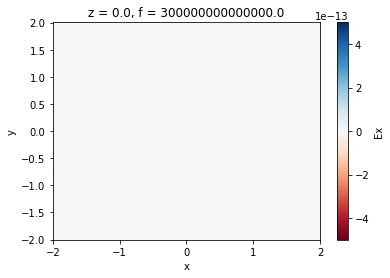

In [7]:
sim_data = web.load_data(task_id, simulation=sim, path='data/sim_data.hdf5')
ax = sim_data['monitor'].Ex.isel(f=0, z=0).imag.plot.pcolormesh(x='x', y='y', vmin=-5e-13, vmax=5e-13, cmap='RdBu')

plt.show()

In [8]:
sim_data.log

Simulation domain Nx, Ny, Nz: [420, 420, 420]
Applied symmetries: [0, 0, 0]
Number of computational grid points: 7.4088e+07.
Using subpixel averaging: True
Number of time steps: 57696
Automatic shutoff factor: 1.00e-05
Time step (s): 1.7332e-17

Get source modes time (s):    0.1350
Get monitor modes time (s):   0.0350
Rest of setup time (s):       0.0841

Starting solver...
- Time step   2307 / time 4.00e-14s (  4 % done), field decay: 1.00e+00
- Time step   4591 / time 7.96e-14s (  7 % done), field decay: 1.00e+00
- Time step   4615 / time 8.00e-14s (  8 % done), field decay: 9.27e-01
- Time step   6923 / time 1.20e-13s ( 12 % done), field decay: 3.16e-02
- Time step   9231 / time 1.60e-13s ( 16 % done), field decay: 2.77e-03
- Time step  11539 / time 2.00e-13s ( 20 % done), field decay: 9.62e-04
- Time step  13847 / time 2.40e-13s ( 24 % done), field decay: 1.13e-03
- Time step  16154 / time 2.80e-13s ( 28 % done), field decay: 1.75e-04
- Time step  18462 / time 3.20e-13s ( 32 % done